In [1]:
import pandas as pd
from glob import glob
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [2]:
# Get a list of all CSV files in a directory
csv_files = glob('extracted_features/*.csv')

# Create an empty dataframe to store the combined data
data = pd.DataFrame()

# Loop through each CSV file and append its contents to the combined dataframe
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    data = pd.concat([data, df])

# Print the combined dataframe


In [3]:
data.head()

,dwell_avg,flight_avg,traj_avg,keyboard_avg,mouse_avg,day_type,freq_mouse,freq_key,label
0,0.076065,0.975780,769.426581,0.828328,673.248259,0.0,7.0,63.0,1
1,0.072647,0.668800,510.113776,0.741447,510.113776,0.0,6.0,45.0,1
2,0.069570,0.646591,406.050055,0.716161,406.050055,0.0,7.0,45.0,1
3,0.070753,0.553134,638.027143,0.623887,638.027143,0.0,3.0,48.0,1
4,0.073334,0.722955,555.470869,0.796289,555.470869,0.0,4.0,51.0,1


In [4]:
len(data)

1760

In [5]:
data.describe()

,dwell_avg,flight_avg,traj_avg,keyboard_avg,mouse_avg,day_type,freq_mouse,freq_key,label
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000
mean,0.115514,0.952100,471.587845,1.018669,464.228611,0.215909,6.855114,46.450000,0.500000
std,0.026339,0.701359,212.388368,0.665014,208.378581,0.411568,4.906752,11.985295,0.500142
min,0.061586,0.188908,179.164520,0.136418,150.595037,0.000000,1.000000,10.000000,0.000000
25%,0.095207,0.555139,322.691455,0.629845,314.966384,0.000000,4.000000,41.000000,0.000000
50%,0.117266,0.749423,411.584994,0.829494,407.741408,0.000000,7.000000,44.000000,0.500000
75%,0.130498,1.115375,559.801943,1.198982,554.780113,0.000000,8.000000,48.000000,1.000000
max,0.214586,9.905352,1860.326693,10.057879,1860.326693,1.000000,71.000000,200.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1760 entries, 0 to 19
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dwell_avg     1760 non-null   float64
 1   flight_avg    1760 non-null   float64
 2   traj_avg      1760 non-null   float64
 3   keyboard_avg  1760 non-null   float64
 4   mouse_avg     1760 non-null   float64
 5   day_type      1760 non-null   float64
 6   freq_mouse    1760 non-null   float64
 7   freq_key      1760 non-null   float64
 8   label         1760 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 137.5 KB


In [7]:
# calculate the corr
correlation = data.corr()

correlation

,dwell_avg,flight_avg,traj_avg,keyboard_avg,mouse_avg,day_type,freq_mouse,freq_key,label
dwell_avg,1.000000,0.212807,-0.207004,0.244630,-0.201533,-5.562126e-02,0.071887,-0.057050,2.633782e-02
flight_avg,0.212807,1.000000,-0.101507,0.958814,-0.116933,4.464992e-02,0.533938,0.236629,-8.527255e-03
traj_avg,-0.207004,-0.101507,1.000000,-0.105851,0.990362,7.795145e-03,-0.311188,-0.007171,-2.393195e-02
keyboard_avg,0.244630,0.958814,-0.105851,1.000000,-0.120678,3.567587e-02,0.467583,0.141321,-7.494742e-03
mouse_avg,-0.201533,-0.116933,0.990362,-0.120678,1.000000,-3.117235e-03,-0.327127,-0.013719,-3.946030e-02
day_type,-0.055621,0.044650,0.007795,0.035676,-0.003117,1.000000e+00,0.048436,-0.035382,-1.442675e-16
freq_mouse,0.071887,0.533938,-0.311188,0.467583,-0.327127,4.843618e-02,1.000000,0.586726,2.698812e-02
freq_key,-0.057050,0.236629,-0.007171,0.141321,-0.013719,-3.538195e-02,0.586726,1.000000,1.147565e-02
label,0.026338,-0.008527,-0.023932,-0.007495,-0.039460,-1.442675e-16,0.026988,0.011476,1.000000e+00


<Axes: >

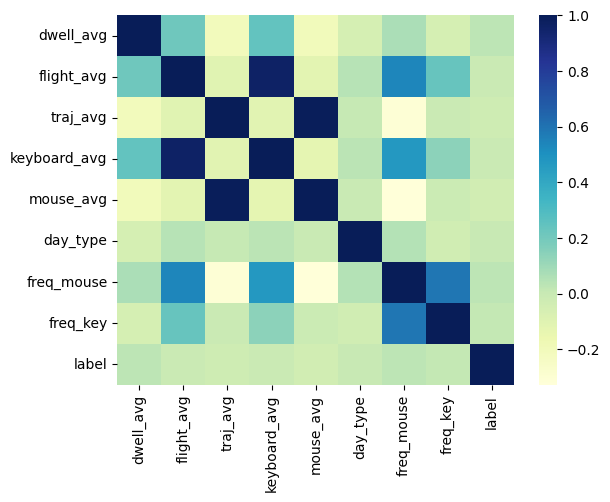

In [8]:
# visualize the correlations

sns.heatmap(correlation, cmap="YlGnBu")

In [9]:
X = data.drop(columns='label')
y = data['label']

In [10]:
# minmax_scaler = MinMaxScaler()
# X[['dwell_avg', 'flight_avg', 'traj_avg',
#    'keyboard_avg', 'mouse_avg', 'day_type',
#    'freq_mouse', 'freq_key']] = minmax_scaler.fit_transform(X[['dwell_avg', 'flight_avg', 'traj_avg',
#                                                                'keyboard_avg', 'mouse_avg', 'day_type',
#                                                                'freq_mouse', 'freq_key']])

In [11]:
X.head()

,dwell_avg,flight_avg,traj_avg,keyboard_avg,mouse_avg,day_type,freq_mouse,freq_key
0,0.076065,0.975780,769.426581,0.828328,673.248259,0.0,7.0,63.0
1,0.072647,0.668800,510.113776,0.741447,510.113776,0.0,6.0,45.0
2,0.069570,0.646591,406.050055,0.716161,406.050055,0.0,7.0,45.0
3,0.070753,0.553134,638.027143,0.623887,638.027143,0.0,3.0,48.0
4,0.073334,0.722955,555.470869,0.796289,555.470869,0.0,4.0,51.0


In [ ]:
# # calculate the corr after scaling
# data_scaled = pd.concat([X, y], axis=1)
# correlation_sc= data_scaled.corr()

# correlation_sc

In [ ]:
# sns.heatmap(correlation_sc, cmap="YlGnBu")

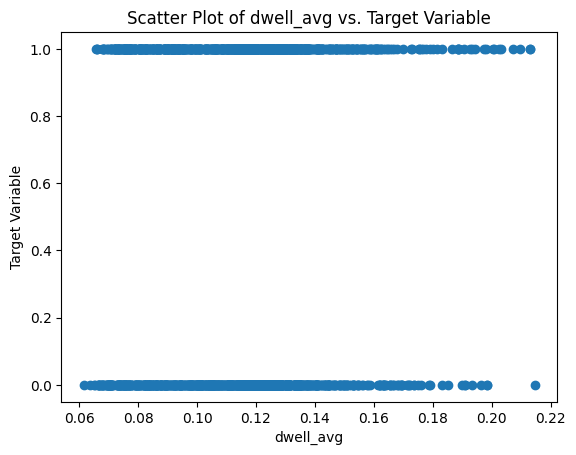

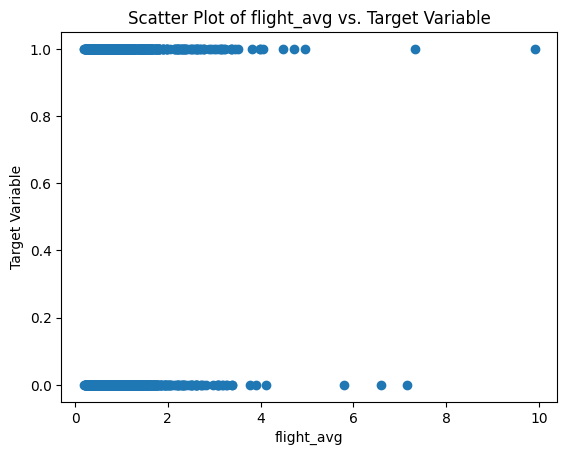

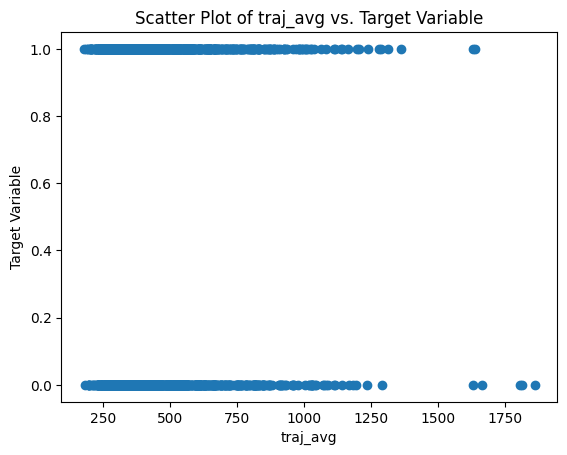

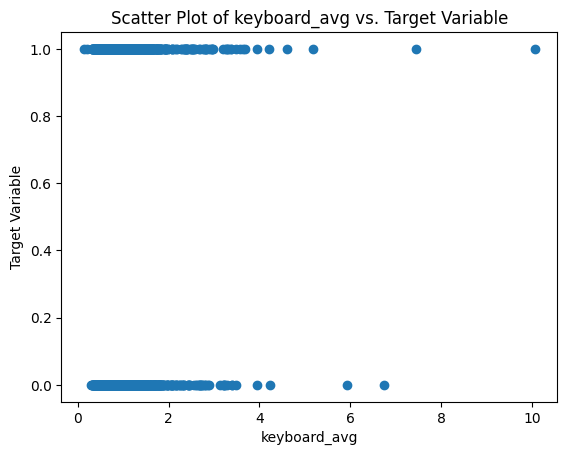

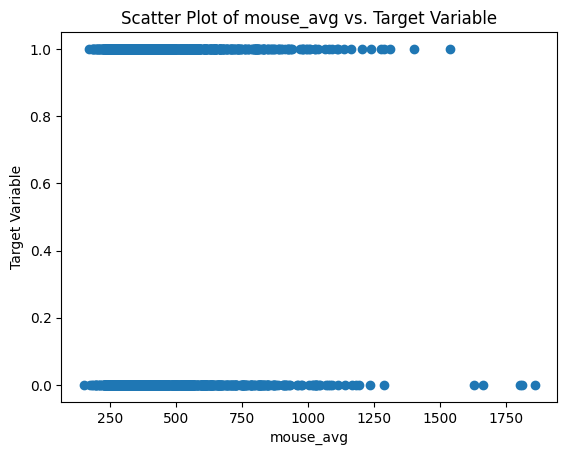

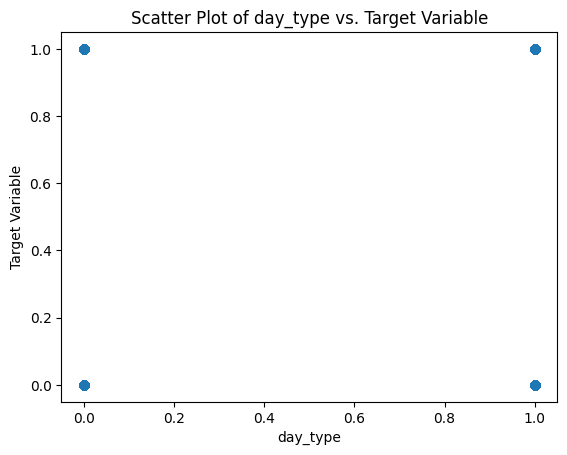

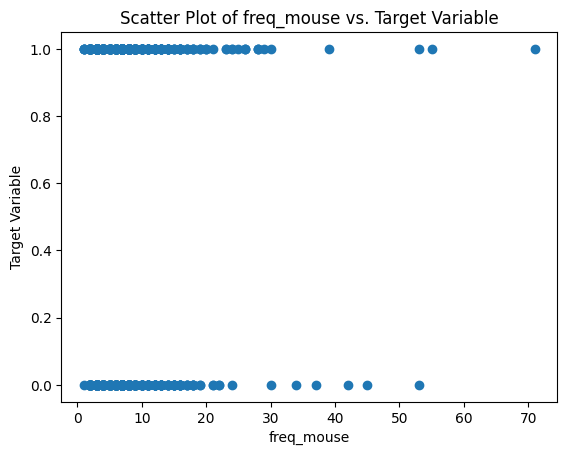

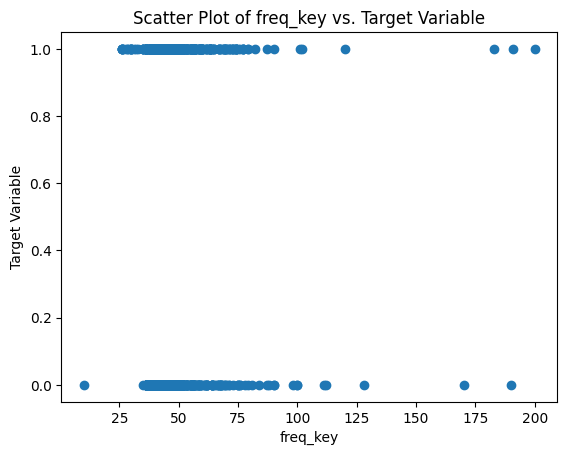

In [14]:
# Get the column names of X
feature_names = X.columns

# Create scatter plots for each feature in X
for feature in feature_names:
    plt.scatter(X[feature], y)
    plt.xlabel(feature)
    plt.ylabel('Target Variable')
    plt.title(f'Scatter Plot of {feature} vs. Target Variable')
    plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [16]:
# # r_scaler = RobustScaler()
# # X_train_scaled = r_scaler.fit_transform(X_train)
# scaler = MinMaxScaler()
# X_train[['traj_avg','mouse_avg']] = scaler.fit_transform(X_train[['traj_avg','mouse_avg']])

In [17]:
model = SVC()

In [ ]:
# model.fit(X_train, y_train)

In [19]:
# X_test[['traj_avg','mouse_avg']] = scaler.transform(X_test[['traj_avg','mouse_avg']])
# y_pred = model.predict(X_test)


In [20]:
# from sklearn.metrics import accuracy_score

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)

In [ ]:
# accuracy

In [22]:
num_transformer = MinMaxScaler()
cat_transformer = OneHotEncoder()


preproc = make_column_transformer(
    (num_transformer, ['dwell_avg',	'flight_avg', 'traj_avg', 'keyboard_avg', 'mouse_avg', 'freq_mouse', 'freq_key']),
    (cat_transformer, ['day_type'])
)

In [23]:
preproc

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['dwell_avg', 'flight_avg', 'traj_avg',
                                  'keyboard_avg', 'mouse_avg', 'freq_mouse',
                                  'freq_key']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['day_type'])])

In [24]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preproc),
    ('classifier', RandomForestClassifier())
])

rf_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['dwell_avg', 'flight_avg',
                                                   'traj_avg', 'keyboard_avg',
                                                   'mouse_avg', 'freq_mouse',
                                                   'freq_key']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['day_type'])])),
                ('classifier', RandomForestClassifier())])

In [25]:
svc_pipeline = Pipeline(steps=[
    ('preprocessor', preproc),
    ('classifier', SVC())
])

svc_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['dwell_avg', 'flight_avg',
                                                   'traj_avg', 'keyboard_avg',
                                                   'mouse_avg', 'freq_mouse',
                                                   'freq_key']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['day_type'])])),
                ('classifier', SVC())])

In [29]:
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['auto', 'sqrt'],
    'classifier__bootstrap': [True, False]
}
grid_search = GridSearchCV(
    rf_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy")

grid_search.fit(X_train, y_train)

grid_search.best_params_

/home/lewagon/.pyenv/versions/3.10.6/envs/biosure/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
810 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
810 fits failed with the following error:
Traceback (most recent call last):
  File "/home/lewagon/.pyenv/versions/3.10.6/envs/biosure/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lewagon/.pyenv/versions/3.10.6/envs/biosure/lib/python3.10/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/lewagon/.pyenv/versions/3.10.6/envs/biosure

{'classifier__bootstrap': True,
 'classifier__max_depth': None,
 'classifier__max_features': 'sqrt',
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 2,
 'classifier__n_estimators': 200}

In [27]:
best_score = grid_search.best_score_
best_score

np.float64(-0.7000603521294563)

In [28]:
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto']
    # Add other hyperparameters as needed
}

grid_search = GridSearchCV(
    svc_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring="r2")

grid_search.fit(X_train, y_train)

grid_search.best_params_

ValueError: Invalid parameter 'svc' for estimator Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['dwell_avg', 'flight_avg',
                                                   'traj_avg', 'keyboard_avg',
                                                   'mouse_avg', 'freq_mouse',
                                                   'freq_key']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['day_type'])])),
                ('classifier', SVC())]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [ ]:
best_score = grid_search.best_score_
best_score